<a href="https://colab.research.google.com/github/Junaidjkhan/Junaid-Khan/blob/main/Walmart_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
!gdown 1lcjtmvtSjco6cnWaJvgJNTGjGJoKieh1

Downloading...
From: https://drive.google.com/uc?id=1lcjtmvtSjco6cnWaJvgJNTGjGJoKieh1
To: /content/walmart-data.csv
100% 23.0M/23.0M [00:00<00:00, 35.3MB/s]


In [2]:
# Importing required libraries -

# For reading & manipulating the data -
import pandas as pd
import numpy as np

# For visualizing the data -
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical functions -
import scipy.stats as stats

In [3]:
# Loading the dataset -
df = pd.read_csv('walmart-data.csv')
df.sample(10)
df.head(10)
df.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [4]:
# Shape of the dataset
df.shape
print('No. of rows:', df.shape[0])
print('No. of columns:', df.shape[1])

No. of rows: 550068
No. of columns: 10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


###Delete Null values and outliers

In [6]:
# Checking for null values:-
df.isnull().sum()
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


No null values found

In [7]:
# Checking for duplicates
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape[0])

0


No duplicate rows found

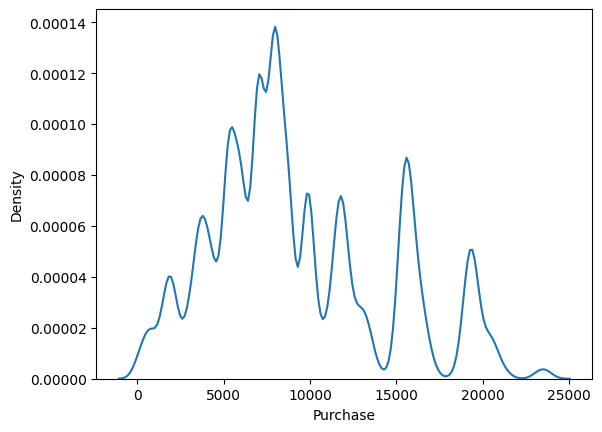

In [8]:
sns.kdeplot(data=df, x='Purchase')
plt.show()

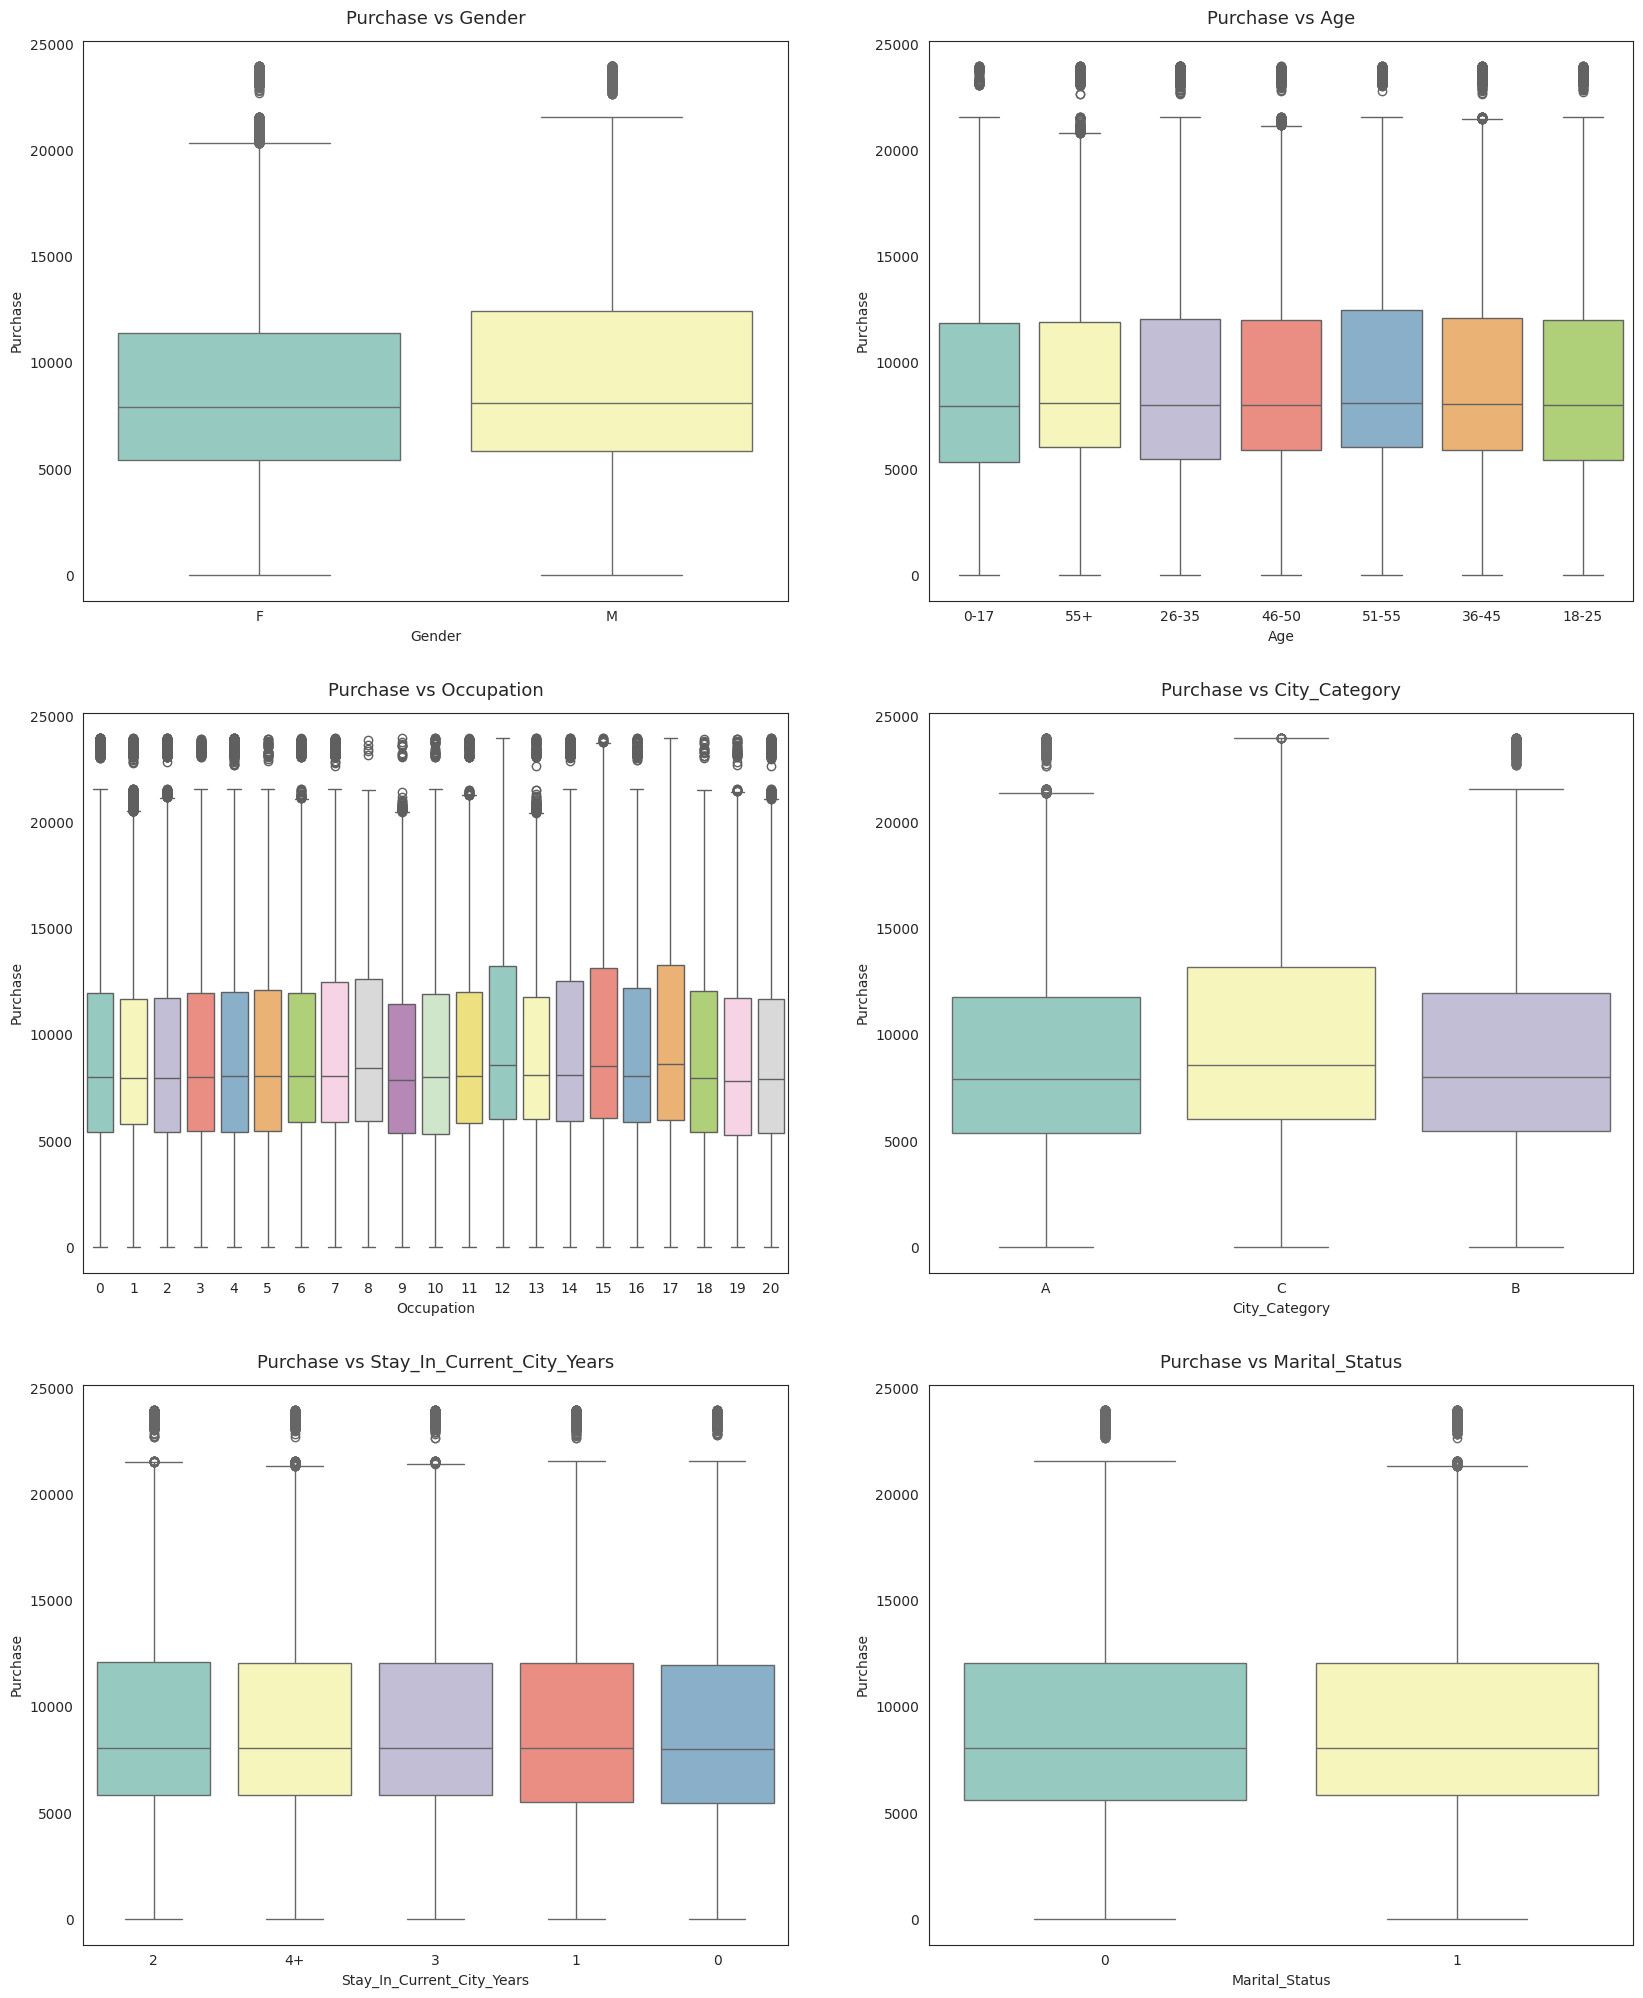

In [9]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], hue=attrs[count], ax=axs[row, col], palette='Set3', legend=False)
        axs[row, col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

In [10]:
q1=df.Purchase.quantile(0.25)
q3=df.Purchase.quantile(0.75)
print(q1,q3)
IQR=q3-q1
outliers = df[((df.Purchase<(q1-1.5*IQR)) | (df.Purchase>(q3+1.5*IQR)))]
print("num outliers : ",len(outliers))
print("percent outliers : ",len(outliers)/len(df))

5823.0 12054.0
num outliers :  2677
percent outliers :  0.004866671029763593


In [11]:
df_clean=df.drop(df[ (df.Purchase > (q3+1.5*IQR)) | (df.Purchase < (q1-1.5*IQR)) ].index)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547391 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     547391 non-null  int64 
 1   Product_ID                  547391 non-null  object
 2   Gender                      547391 non-null  object
 3   Age                         547391 non-null  object
 4   Occupation                  547391 non-null  int64 
 5   City_Category               547391 non-null  object
 6   Stay_In_Current_City_Years  547391 non-null  object
 7   Marital_Status              547391 non-null  int64 
 8   Product_Category            547391 non-null  int64 
 9   Purchase                    547391 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 45.9+ MB


In [12]:
df=df_clean.reset_index()

##Data Exploration

In [13]:
# Statistical summary of the dataset -
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,547391.0,NaN,NaN,NaN,275045.736771,158805.5206,0.0,137522.5,275043.0,412572.5,550067.0
User_ID,547391.0,NaN,NaN,NaN,1003028.432583,1727.356809,1000001.0,1001516.0,1003075.0,1004478.0,1006040.0
Product_ID,547391,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,547391,2,M,412171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,547391,7,26-35,218661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,547391.0,NaN,NaN,NaN,8.074627,6.521586,0.0,2.0,7.0,14.0,20.0
City_Category,547391,3,B,230114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,547391,5,1,192845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,547391.0,NaN,NaN,NaN,0.409486,0.491739,0.0,0.0,0.0,1.0,1.0
Product_Category,547391.0,NaN,NaN,NaN,5.378945,3.927383,1.0,1.0,5.0,8.0,20.0


In [14]:
df['User_ID'].nunique()

5891

In [15]:
df['Product_ID'].nunique()

3631

In [16]:
df['Gender'].value_counts()/len(df)

,count
Gender,
M,0.752974
F,0.247026


In [17]:
Categorical_rows = ['Gender','Age','Stay_In_Current_City_Years','Marital_Status','City_Category']
df[Categorical_rows].melt().groupby(['variable','value'])[['value']].count()*100/len(df)

value
variable                   value           
Age                        0-17    2.746117
                           18-25  18.146809
                           26-35  39.946035
                           36-45  19.987358
                           46-50   8.301561
                           51-55   6.976914
                           55+     3.895205
City_Category              A      26.861238
                           B      42.038324
                           C      31.100438
Gender                     F      24.702635
                           M      75.297365
Marital_Status             0      59.051391
                           1      40.948609
Stay_In_Current_City_Years 0      13.525250
                           1      35.229845
                           2      18.521313
                           3      17.319247
                           4+     15.404345

**1. Age Distribution**
The majority of users (around 40%) fall in the 26-35 age group, making it the largest customer segment.
The 36-45 age group follows, comprising 20% of users.
Younger users (18-25) make up 18%, while older users (46+ years) collectively contribute around 19%.
Very few users (~3%) are under the age of 17.

**2. City Category Distribution**
The highest proportion of users (42%) come from City Category B.
City C contributes 31% of users, while City A accounts for 27%.
This suggests that users from mid-sized cities (B & C) form the majority of the customer base.

**3. Gender Distribution**
A significantly higher percentage of users (75%) are male, while only 25% are female.
This indicates that the platform or product is more popular among male customers.

**4. Marital Status**
A larger proportion (59%) of users are single, compared to 41% who are married.
This suggests that the product may appeal more to unmarried individuals.

**5. Stay Duration in Current City**
The majority of users (35%) have been staying in their current city for 1 year, followed by 18% for 2 years.
Around 17% have lived in their city for 3 years, and 15% for 4+ years.
A relatively smaller proportion (13.5%) are newcomers (0 years).
This could indicate a mix of both stable and migrating users.

**- Overall Summary**

The core customer base consists of males aged 26-35 from City Category B.
A large proportion of users are single and have lived in their city for 1-3 years.
City B & C residents form the majority, while City A has the lowest representation.

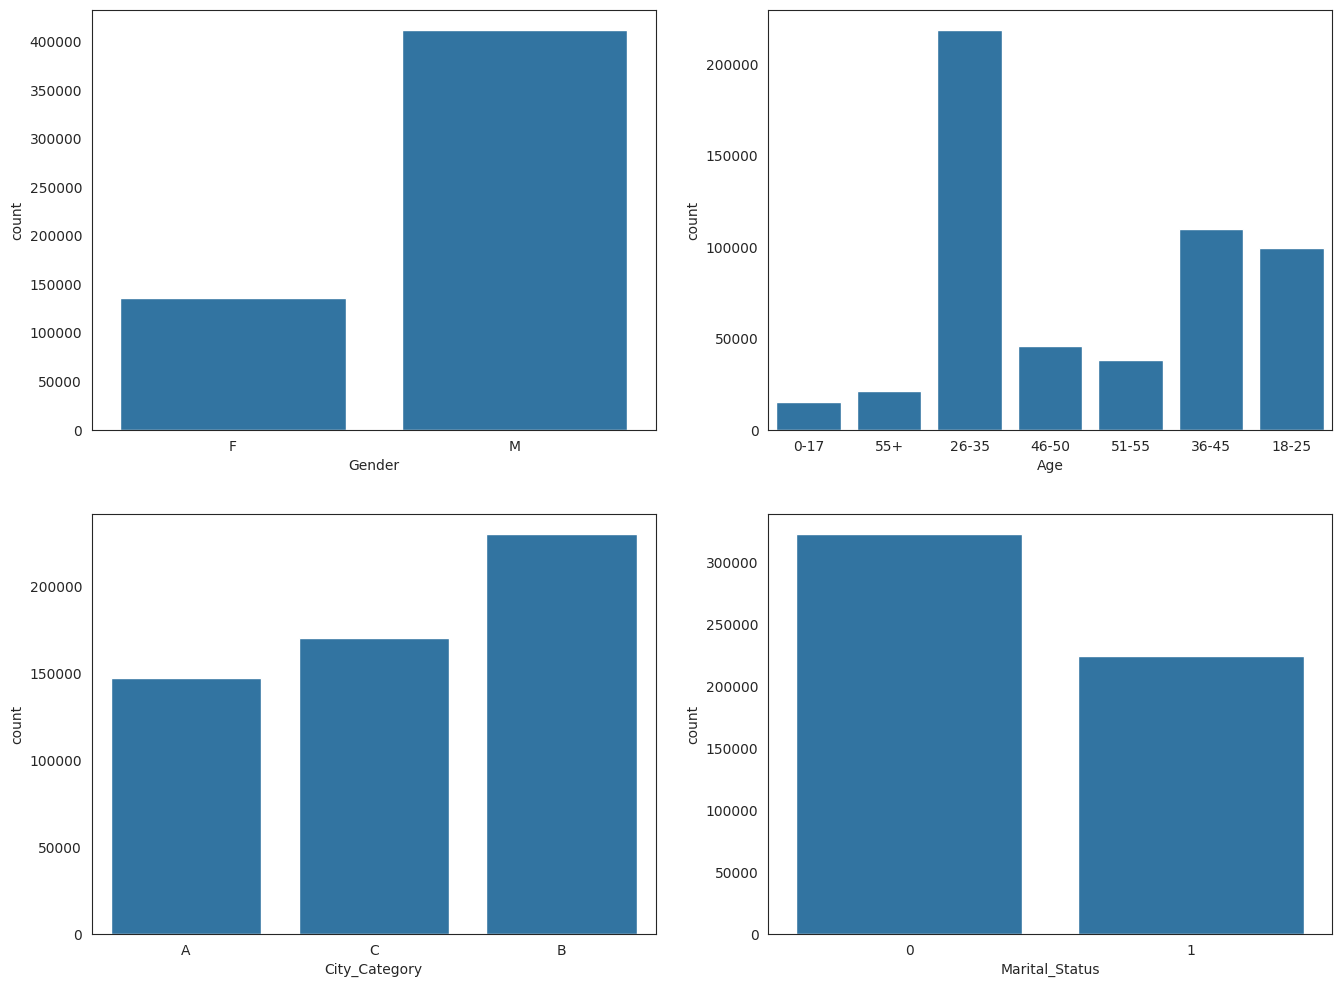

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Age', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

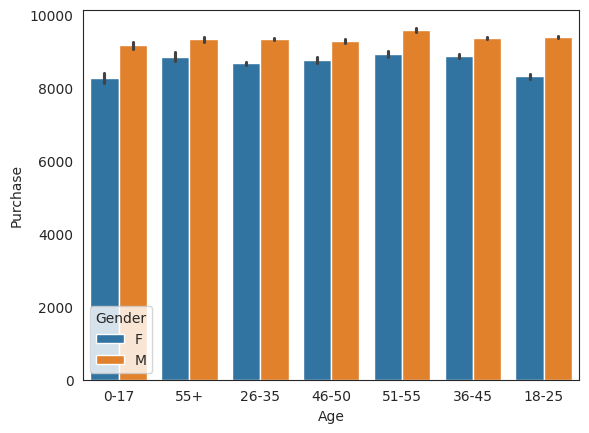

In [19]:
sns.barplot(data=df, x='Age', y='Purchase',hue="Gender")

<Axes: xlabel='Age', ylabel='Purchase'>

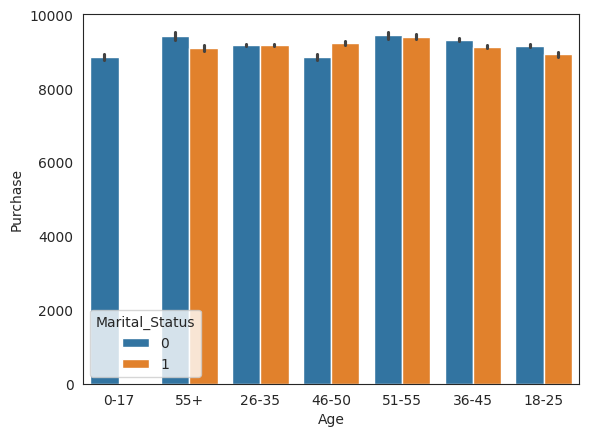

In [20]:
sns.barplot(data=df, x='Age', y='Purchase',hue="Marital_Status")

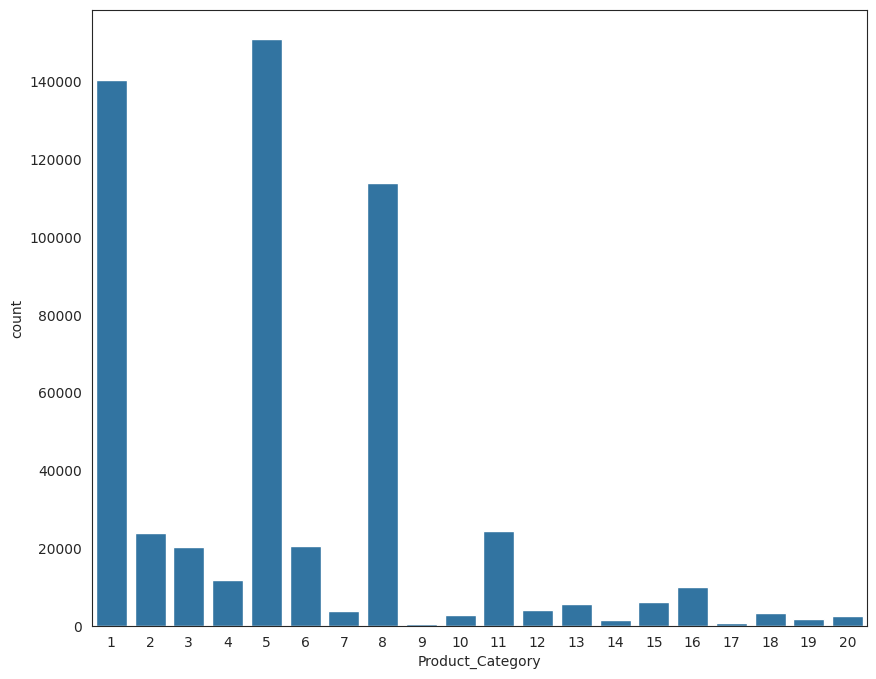

In [21]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

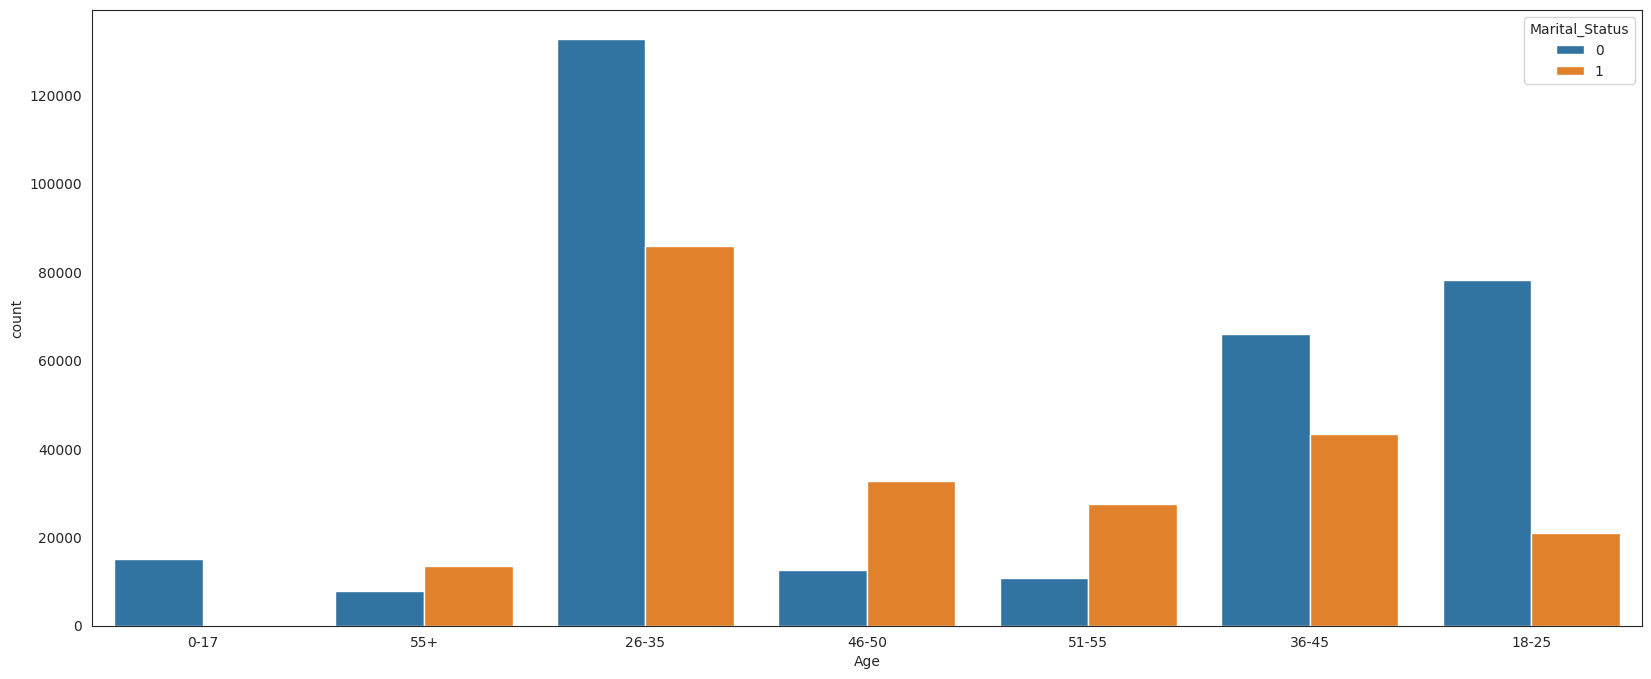

In [22]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='Age',hue='Marital_Status')
plt.show()

- As expected, there are no married individuals in the 0-17 age group.
- Up to the age of 45, the number of unmarried individuals is higher than married ones.
- After the age of 45, the number of married individuals exceeds the unmarried ones.

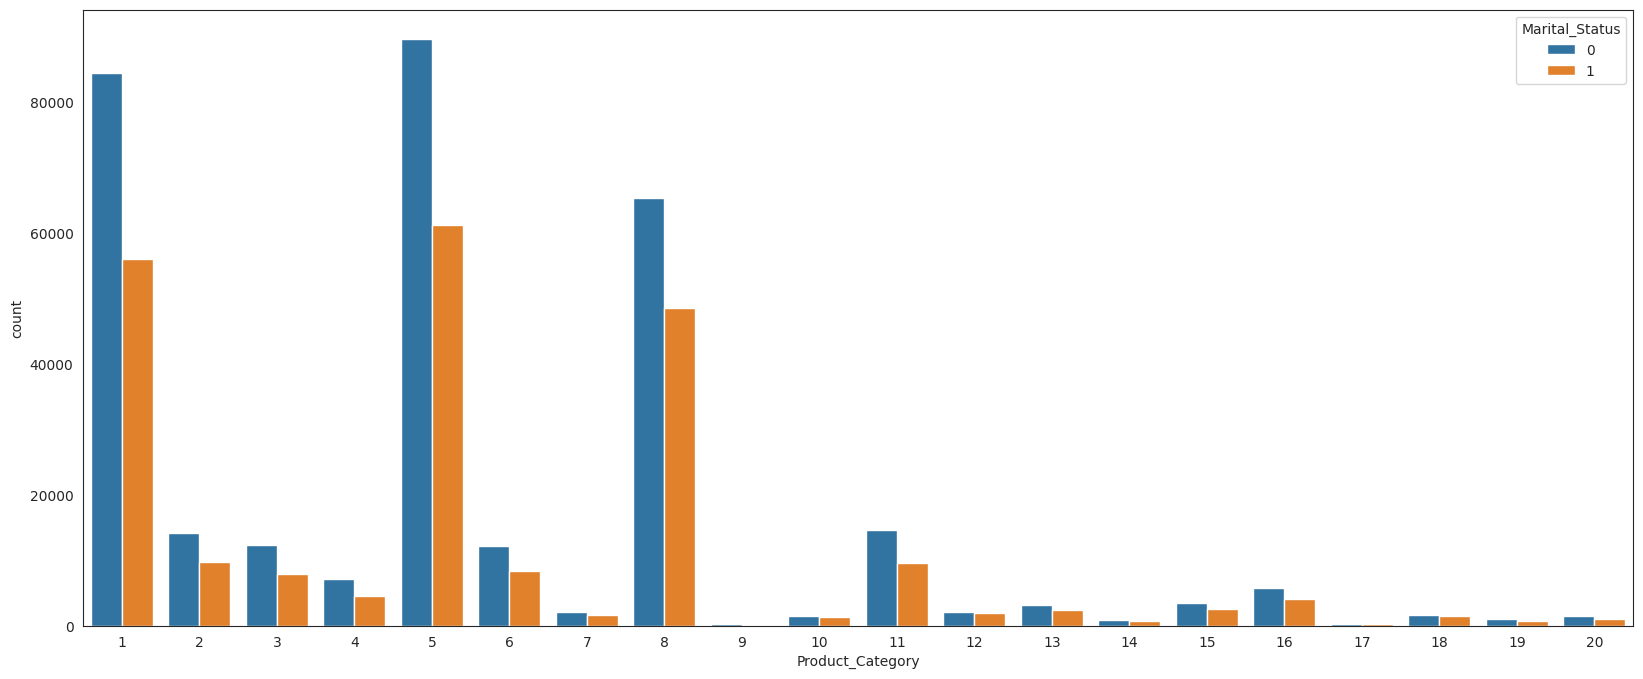

In [23]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='Product_Category',hue='Marital_Status')
plt.show()

## How does gender affect the amount spent?

In [24]:
# Checking different metrics based on purchase by different genders -
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135220.0,8671.049039,4679.058483,12.0,5429.0,7906.0,11064.0,21398.0
M,412171.0,9367.724355,5009.234088,12.0,5852.0,8089.0,12247.0,21399.0


In [25]:
## run it multiple times
df.sample(500).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,107.0,8739.476636,4092.670974,743.0,5996.0,8041.0,10551.0,20634.0
M,393.0,8877.592875,4569.020437,136.0,5938.0,7994.0,11729.0,20419.0


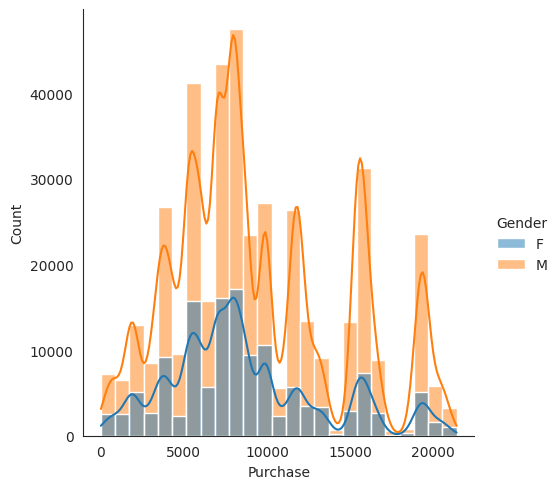

In [26]:
sns.displot(x='Purchase', bins=25, kde=True,hue='Gender', data=df )

We can see that the distribution is close to normal.

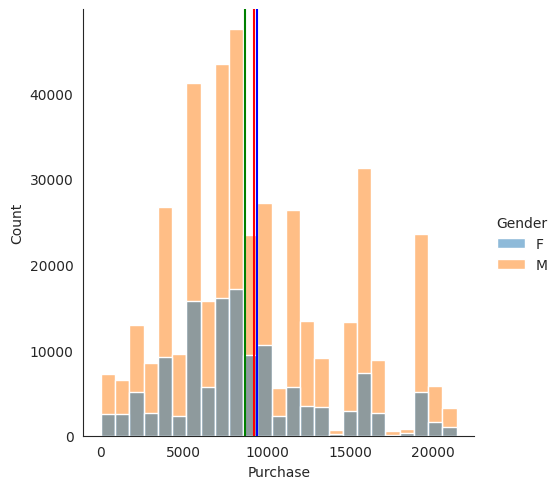

In [27]:
sns.displot(x='Purchase', data=df, bins=25, hue='Gender')

plt.axvline(x=df['Purchase'].mean(), color='r')
plt.axvline(x=df[df['Gender']=='M']['Purchase'].mean(), color='b')
plt.axvline(x=df[df['Gender']=='F']['Purchase'].mean(), color='g')

plt.show()

The mean purchase amounts for males, females, and the overall dataset are quite similar, with females spending slightly less on average.

Let's dive deeper into the details.

##Female Purchases

In [31]:
# Female Purchases
Female_data = df[df["Gender"]=="F"]
print("Female Purchase amount Mean:"+ str(Female_data["Purchase"].mean()))
print("Female Purchase amount SD:"+ str(Female_data["Purchase"].std()))

Female Purchase amount Mean:8671.049038603756
Female Purchase amount SD:4679.058483084425


##Let us pick around 1,000 random samples of size 300 from the entire data set and calculate the mean of each sample.

In [28]:
female_sample_means=[df[df['Gender']=='F'].sample(300, replace=True)['Purchase'].mean() for i in range(1000)]

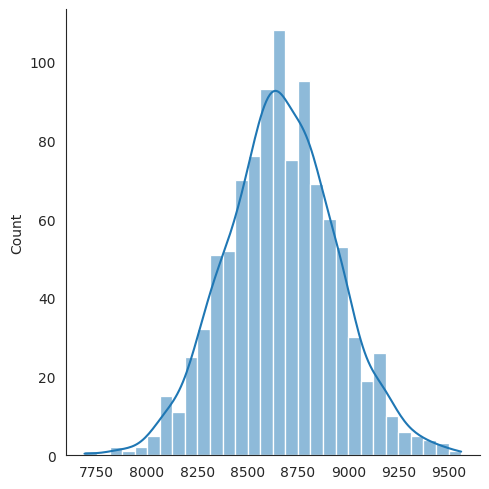

In [29]:
sns.displot(female_sample_means,bins=30, kde=True )

In [33]:
females_sample_means_600=[df[df['Gender']=='F'].sample(600, replace=True)['Purchase'].mean() for i in range(1000)]

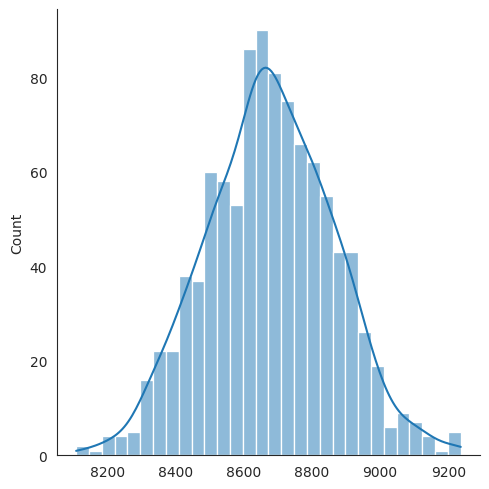

In [34]:
sns.displot(females_sample_means_600,bins=30, kde=True )

As the sample size increases, the sampling distribution becomes more normally distributed, with reduced deviation.

In [35]:
print("Sample distribution mean for females : ",sum(females_sample_means_600) / len(females_sample_means_600))

Sample distribution mean for females :  8675.96046499999


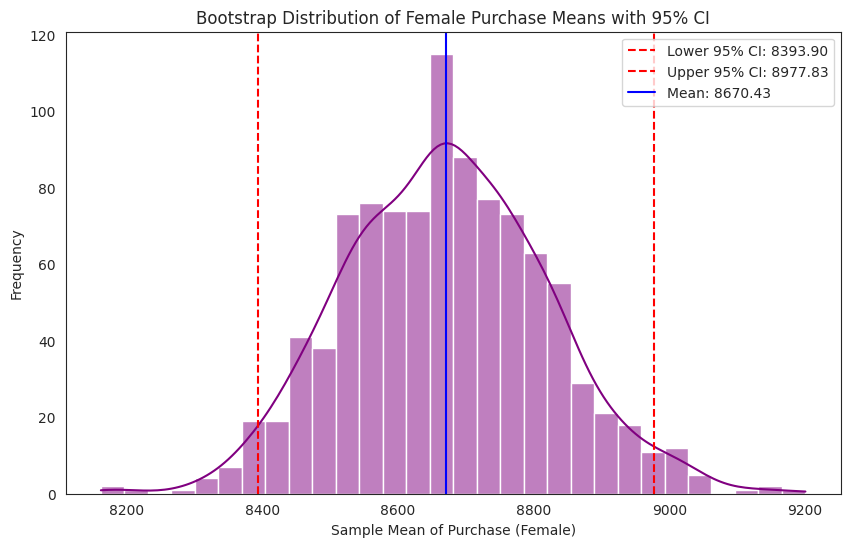

95% Confidence Interval for Female Purchase Mean: (8393.90, 8977.83)


In [36]:
# Generate bootstrap sample means for females
female_sample_means = [df[df['Gender']=='F'].sample(1000, replace=True)['Purchase'].mean() for i in range(1000)]

# Compute the 95% Confidence Interval
lower_bound = np.percentile(female_sample_means, 2.5)
upper_bound = np.percentile(female_sample_means, 97.5)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(female_sample_means, bins=30, kde=True, color="purple")

# Add vertical lines for confidence interval
plt.axvline(lower_bound, color='red', linestyle='dashed', label=f'Lower 95% CI: {lower_bound:.2f}')
plt.axvline(upper_bound, color='red', linestyle='dashed', label=f'Upper 95% CI: {upper_bound:.2f}')
plt.axvline(np.mean(female_sample_means), color='blue', linestyle='solid', label=f'Mean: {np.mean(female_sample_means):.2f}')

# Labels and title
plt.xlabel("Sample Mean of Purchase (Female)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of Female Purchase Means with 95% CI")
plt.legend()
plt.show()

# Print confidence interval
print(f"95% Confidence Interval for Female Purchase Mean: ({lower_bound:.2f}, {upper_bound:.2f})")

##Male's Purchases

In [37]:
# Male Purchases
Male_data = df[df["Gender"]=="M"]
print("Male Purchase amount Mean:"+ str(Male_data["Purchase"].mean()))
print("Male Purchase amount SD:"+ str(Male_data["Purchase"].std()))

Male Purchase amount Mean:9367.724354697444
Male Purchase amount SD:5009.234087946683


In [38]:
male_sample_means=[df[df['Gender']=='M'].sample(300, replace=True)['Purchase'].mean() for i in range(1000)]

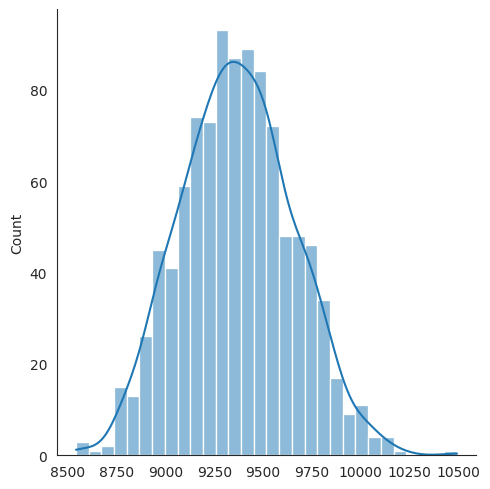

In [39]:
sns.displot(male_sample_means,bins=30, kde=True )

In [40]:
males_sample_means_600=[df[df['Gender']=='M'].sample(600, replace=True)['Purchase'].mean() for i in range(1000)]

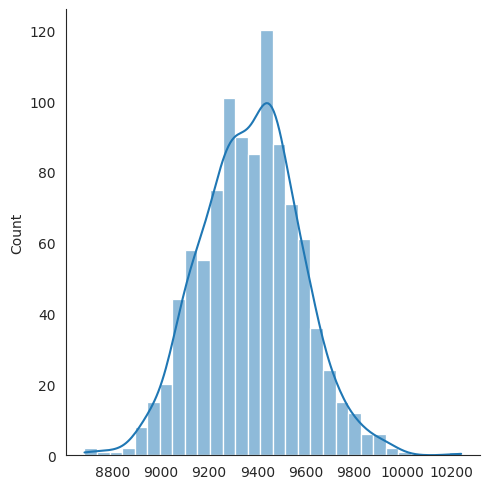

In [43]:
sns.displot(males_sample_means_600,bins=30, kde=True )

In [45]:
print("Sample distribution mean for males : ",sum(male_sample_means) / len(male_sample_means))

Sample distribution mean for males :  9371.82929899999


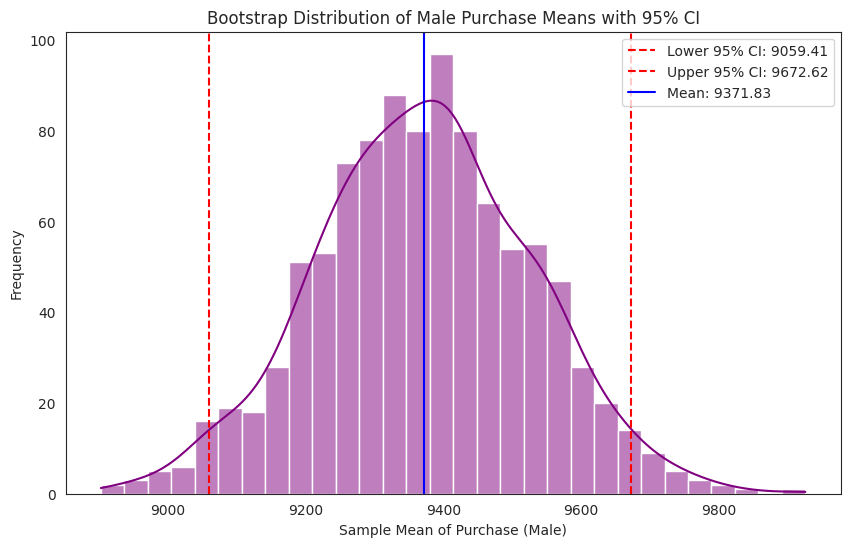

95% Confidence Interval for Male Purchase Mean: (9059.41, 9672.62)


In [44]:
# Generate bootstrap sample means for females
male_sample_means = [df[df['Gender']=='M'].sample(1000, replace=True)['Purchase'].mean() for i in range(1000)]

# Compute the 95% Confidence Interval
lower_bound = np.percentile(male_sample_means, 2.5)
upper_bound = np.percentile(male_sample_means, 97.5)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(male_sample_means, bins=30, kde=True, color="purple")

# Add vertical lines for confidence interval
plt.axvline(lower_bound, color='red', linestyle='dashed', label=f'Lower 95% CI: {lower_bound:.2f}')
plt.axvline(upper_bound, color='red', linestyle='dashed', label=f'Upper 95% CI: {upper_bound:.2f}')
plt.axvline(np.mean(male_sample_means), color='blue', linestyle='solid', label=f'Mean: {np.mean(male_sample_means):.2f}')

# Labels and title
plt.xlabel("Sample Mean of Purchase (Male)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of Male Purchase Means with 95% CI")
plt.legend()
plt.show()

# Print confidence interval
print(f"95% Confidence Interval for Male Purchase Mean: ({lower_bound:.2f}, {upper_bound:.2f})")

The mean of the sampling distribution, which represents the average of all the sample means taken, is very close to the original population mean.

#Females:

- Population Mean: **8671**
- Sample Mean: **8675**

#Males:

- Population Mean: **9367**
- Sample Mean: **9371**

This aligns with the first property of the Central Limit Theorem, which states that the sampling distribution mean approximates the population mean.

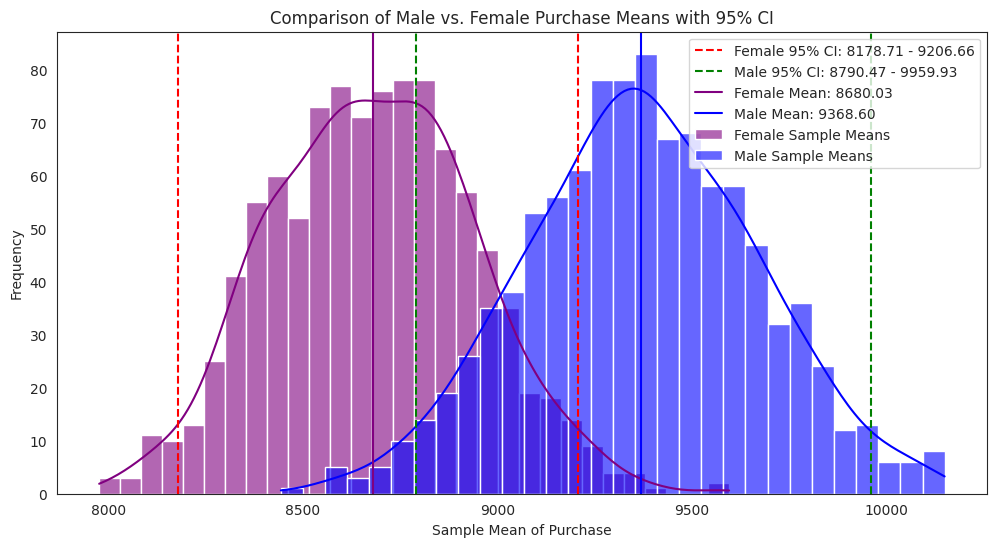

95% Confidence Interval for Female Purchase Mean: (8178.71, 9206.66)
95% Confidence Interval for Male Purchase Mean: (8790.47, 9959.93)


In [46]:
female_sample_means = [df[df['Gender']=='F'].sample(300, replace=True)['Purchase'].mean() for i in range(1000)]
male_sample_means = [df[df['Gender']=='M'].sample(300, replace=True)['Purchase'].mean() for i in range(1000)]

# Compute the 95% Confidence Intervals
female_lower, female_upper = np.percentile(female_sample_means, [2.5, 97.5])
male_lower, male_upper = np.percentile(male_sample_means, [2.5, 97.5])

# Visualization
plt.figure(figsize=(12, 6))
sns.histplot(female_sample_means, bins=30, kde=True, color="purple", label="Female Sample Means", alpha=0.6)
sns.histplot(male_sample_means, bins=30, kde=True, color="blue", label="Male Sample Means", alpha=0.6)

# Add vertical lines for confidence intervals
plt.axvline(female_lower, color='red', linestyle='dashed', label=f'Female 95% CI: {female_lower:.2f} - {female_upper:.2f}')
plt.axvline(female_upper, color='red', linestyle='dashed')
plt.axvline(male_lower, color='green', linestyle='dashed', label=f'Male 95% CI: {male_lower:.2f} - {male_upper:.2f}')
plt.axvline(male_upper, color='green', linestyle='dashed')

# Add means
plt.axvline(np.mean(female_sample_means), color='purple', linestyle='solid', label=f'Female Mean: {np.mean(female_sample_means):.2f}')
plt.axvline(np.mean(male_sample_means), color='blue', linestyle='solid', label=f'Male Mean: {np.mean(male_sample_means):.2f}')

# Labels and title
plt.xlabel("Sample Mean of Purchase")
plt.ylabel("Frequency")
plt.title("Comparison of Male vs. Female Purchase Means with 95% CI")
plt.legend()
plt.show()

# Print confidence intervals
print(f"95% Confidence Interval for Female Purchase Mean: ({female_lower:.2f}, {female_upper:.2f})")
print(f"95% Confidence Interval for Male Purchase Mean: ({male_lower:.2f}, {male_upper:.2f})")

## Impact of Marital Status on Spending Amount

In [47]:
# Mapping integer values 0/1 to Unmarried/Married -
df['Marital_Status'] = df['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})

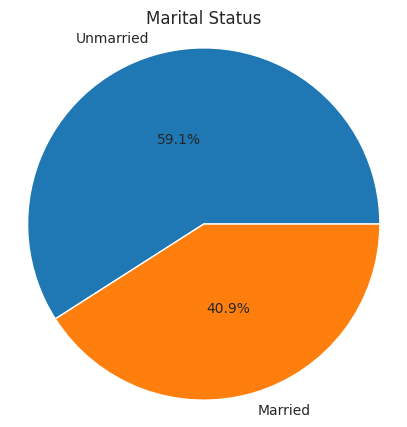

In [48]:
# Marital Status -
x = df['Marital_Status'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(x, center=(0, 0), radius=1.5, labels=df['Marital_Status'].unique(), autopct='%1.1f%%', pctdistance=0.5)
plt.title('Marital Status')
plt.axis('equal')
plt.show()

In [49]:
# No. of unique users in each category -
df.groupby('Marital_Status')['User_ID'].nunique()

,User_ID
Marital_Status,
Married,2474
Unmarried,3417


In [50]:
# Checking different metrics based on purchase by different categories -
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,224149.0,9187.040076,4925.205232,12.0,5833.0,8042.0,12006.0,21398.0
Unmarried,323242.0,9201.581849,4948.327397,12.0,5480.0,8035.0,12028.0,21399.0


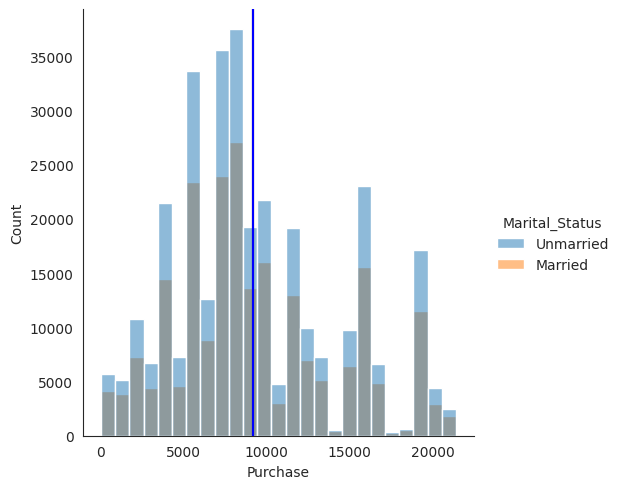

In [51]:
# Plotting all the observations -


sns.displot(x='Purchase', data=df, bins=25, hue='Marital_Status')

plt.axvline(x=df['Purchase'].mean(), color='r')
plt.axvline(x=df[df['Marital_Status']=='Married']['Purchase'].mean(), color='g')
plt.axvline(x=df[df['Marital_Status']=='Unmarried']['Purchase'].mean(), color='b')


plt.show()

#The distribution of Purchase appears close to normal.

- Let us pick around 1,000 random samples of size 300 from the entire data set and calculate the mean of each sample.

Size = 300

Iterations = 1000

In [54]:
unmarried_sample_means=[df[df['Marital_Status']=='Unmarried']['Purchase'].sample(300).mean() for i in range(1000)]
married_sample_means=[df[df['Marital_Status']=='Married']['Purchase'].sample(300).mean() for i in range(1000)]

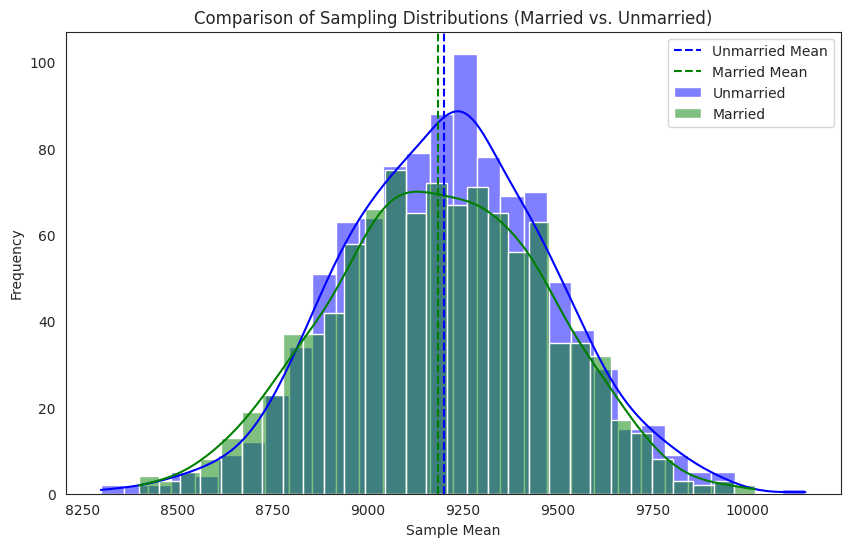

In [55]:
plt.figure(figsize=(10, 6))

# Plot both distributions
sns.histplot(unmarried_sample_means, bins=30, kde=True, color='blue', label="Unmarried")
sns.histplot(married_sample_means, bins=30, kde=True, color='green', label="Married")

# Add vertical lines for the population mean of each category
plt.axvline(x=df[df['Marital_Status'] == 'Unmarried']['Purchase'].mean(), color='blue', linestyle='dashed', label="Unmarried Mean")
plt.axvline(x=df[df['Marital_Status'] == 'Married']['Purchase'].mean(), color='green', linestyle='dashed', label="Married Mean")

plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Comparison of Sampling Distributions (Married vs. Unmarried)")
plt.legend()
plt.show()

In [56]:
# Mean of the sampling distributions
mean_unmarried = np.mean(unmarried_sample_means)
mean_married = np.mean(married_sample_means)

# Standard deviation of the sampling distributions (Standard Error)
std_unmarried = np.std(unmarried_sample_means, ddof=1)  # ddof=1 for sample std dev
std_married = np.std(married_sample_means, ddof=1)

print(f"Unmarried - Mean: {mean_unmarried:.2f}, Standard Deviation: {std_unmarried:.2f}")
print(f"Married - Mean: {mean_married:.2f}, Standard Deviation: {std_married:.2f}")

Unmarried - Mean: 9210.43, Standard Deviation: 276.42
Married - Mean: 9187.20, Standard Deviation: 282.31


# Insights from the Sampling Distributions

- **Mean Comparison:**

**Unmarried Mean = 9210.43**

**Married Mean = 9187.20**

**Observation:** The means are very close, indicating that both groups have similar average purchases.

- **Standard Deviation (Standard Error) Comparison:**

**Unmarried SE = 276.42**

**Married SE = 282.31**

**Observation:** The standard errors are also close, suggesting that both groups have similar variability in their spending patterns.

## To determine a range where the true mean likely falls for each group, let's calculate the 95% Confidence Interval (CI)

In [58]:
# 95% Confidence Interval Calculation
ci_unmarried = stats.norm.interval(0.95, loc=mean_unmarried, scale=std_unmarried / np.sqrt(600))
ci_married = stats.norm.interval(0.95, loc=mean_married, scale=std_married / np.sqrt(600))

print(f"95% CI for Unmarried: {ci_unmarried}")
print(f"95% CI for Married: {ci_married}")

95% CI for Unmarried: (9188.308205473391, 9232.543461193274)
95% CI for Married: (9164.612804844472, 9209.791721822197)


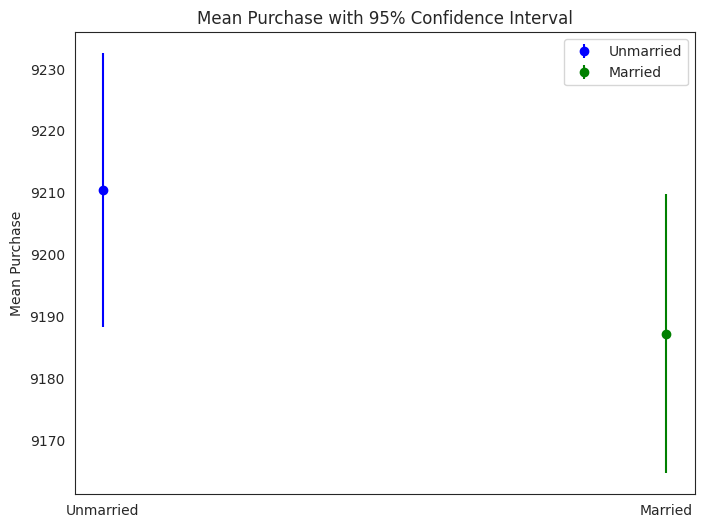

In [60]:
plt.figure(figsize=(8, 6))

# Unmarried Error Bar
plt.errorbar(x='Unmarried',
             y=mean_unmarried,
             yerr=ci_unmarried[1] - mean_unmarried,
             fmt='o', color='blue', label='Unmarried')

# Married Error Bar
plt.errorbar(x='Married',
             y=mean_married,
             yerr=ci_married[1] - mean_married,
             fmt='o', color='green', label='Married')

plt.ylabel('Mean Purchase')
plt.title('Mean Purchase with 95% Confidence Interval')
plt.legend()
plt.show()

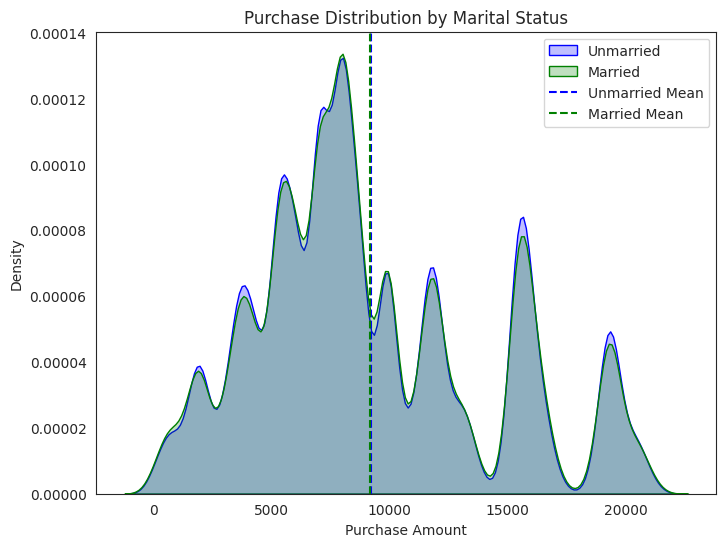

In [63]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Marital_Status'] == 'Unmarried']['Purchase'], label='Unmarried', color='blue', fill=True)
sns.kdeplot(df[df['Marital_Status'] == 'Married']['Purchase'], label='Married', color='green', fill=True)

plt.axvline(mean_unmarried, color='blue', linestyle='dashed', label='Unmarried Mean')
plt.axvline(mean_married, color='green', linestyle='dashed', label='Married Mean')

plt.title('Purchase Distribution by Marital Status')
plt.xlabel('Purchase Amount')
plt.legend()
plt.show()

# 📌 Summary of Observations & Insights  

Throughout this analysis, we explored purchase behavior across different demographic factors using statistical methods and visualizations. Below is a structured summary of our key findings:  

## 🔍 1. Purchase Behavior by Gender  

- **Boxplot Analysis:** Males tend to spend slightly more than females.  
- **Distribution Analysis:** Mean purchase values for males and females are close, but females spend slightly less.  

### 📊 Sampling Distribution:  
- Mean of the sampled **female** purchases closely matches the population mean (**8671 vs. 8675**).  
- Mean of the sampled **male** purchases closely matches the population mean (**9367 vs. 9371**).  
- ✅ **This confirms the Central Limit Theorem:** The sampling distribution mean approximates the population mean.  

---

## 🔍 2. Purchase Behavior by Marital Status  

- **Married vs. Unmarried Spending:**  
  - **Unmarried Mean:** 9210.43  
  - **Married Mean:** 9187.20  
  - 📌 Standard deviations are close, indicating similar purchase variability.  
- **Distribution Analysis:** The spending distribution is approximately **normal** for both groups.  

### 📊 Sampling Distribution Analysis:  
- **Sampling distribution means** for both groups closely match their original **population means**.  
- ✅ **This further validates the Central Limit Theorem.**  

---

## 📊 3. Confidence Interval Analysis  

- **95% Confidence Intervals (CI)** were calculated and visualized for both **Married and Unmarried** groups.  
- **Visualization Insight:**  
  - The **confidence intervals overlap**, suggesting **no statistically significant difference** in spending between married and unmarried users.  

---

## 🚀 Final Takeaways  

✔ **The Central Limit Theorem holds**, as the sampling distribution means approximate population means.  
✔ **Gender-based spending is slightly higher for males**, but the difference is not very large.  
✔ **Marital status has little impact on purchase behavior**, as seen from the overlapping confidence intervals.  
✔ **The overall spending distribution is close to normal**, making sampling-based estimations **reliable**.  
